In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Path hack.
import sys, os
sys.path.insert(0, os.path.abspath('..'))
from scripts.data_utils.generators import SeismicImageGenerator,crop_image
from scripts.data_utils.augmentation import augment, rot, noise, crop, zom_indp, shear, flip_hor, flip_vert, bright


#load  seimsic data
chapterName = "04-augmentation-slice"
output_folder = "/Users/anderskampenes/Documents/Dokumenter/NTNU/MASTER/code/notebooks/" + chapterName




/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

os.path.exists(filename) False /Users/anderskampenes/Documents/Dokumenter/NTNU/MASTER/code/data/processed/f3_entire_int8_inline.npy
No data found at /Users/anderskampenes/Documents/Dokumenter/NTNU/MASTER/code/data/processed/f3_entire_int8_inline.npy. Generating new from seimsic cube
651 951 462
data.shape, label.shape :  (651, 951, 462) (651,)
Splits 0.9 0.9
train/testsplit:  (585, 951, 462) (66, 951, 462) (585,) (66,)
train/val split:  (526, 951, 462) (59, 951, 462)
Sequence of indexes used as labels for train, val and test:  525 584 650
splits plot 0.81 0.9


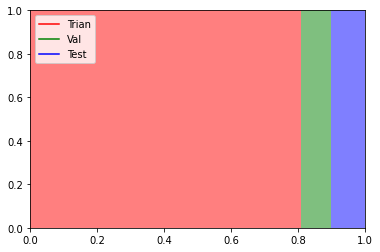

idx [480]
before cropped_labels  (1,) [480]
cropped_batch  (1, 256, 256) 1
0 1
after cropped_labels  (1, 1) [[480]]
next shape (1, 256, 256) (1, 1)
SeismicGenerator outputs:  (1, 256, 256) (1, 1)


In [7]:
# fetch a 256*246 image with generator 
image_size = 256
num_crops = 1
batch_size = 1
ag = SeismicImageGenerator(batch_size=batch_size, image_size=image_size, num_crops=num_crops, subset="train", augmentation=False)
# Using for loop to print out siemsc form generator
max = 10
for (x, y) in ag:
    print("SeismicGenerator outputs: ", x.shape, y.shape)
    #plotting a random patch 
    
    img = x[0].T
    break;



original:


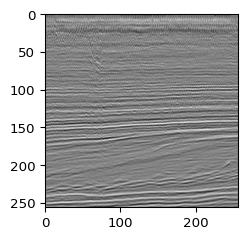

rotation:


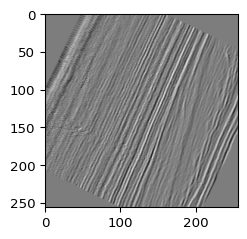

noise:


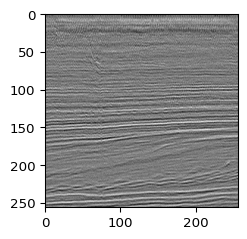

crop:


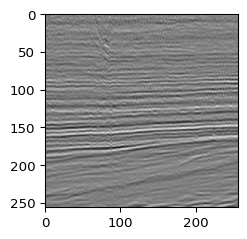

zoom independently:


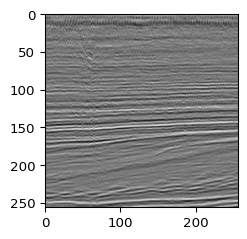

shearing:


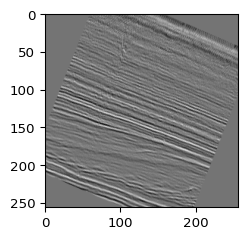

hor flip:


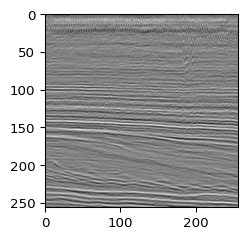

vert flip:


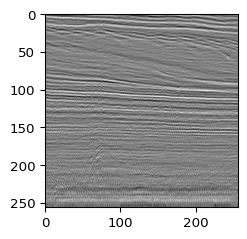

brightness


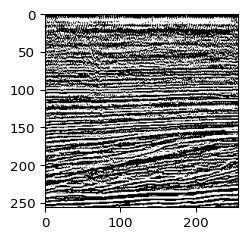

In [8]:
# now we perform augmentation 
import imageio
import imgaug as ia
import imgaug.augmenters as iaa
import numpy as np
import pandas as pd
from skimage import exposure

# Basic data augmentation techniques:
# Flipping: flipping the image vertically or horizontally
# Rotation: rotates the image by a specified degree.
# Shearing: shifts one part of the image like a parallelogram
# translation: 
# scale: 
# Cropping: object appear in different positions in different proportions in the image
# Changing brightness or contrast
print("original:")
ia.imshow(img)

# rotation
print("rotation:")
r_img = rot(img)
ia.imshow(r_img)


# adding noise 
print("noise:")
n_img = noise(img)
ia.imshow(n_img)

# cropping and resiszing the image 
print("crop:")
c_img = crop(img)
ia.imshow(c_img)

# zoom axis indepentently 
print("zoom independently:")
z_img = zom_indp(img)
ia.imshow(z_img)

# Shearing the image by 0 to 40 degrees
print("shearing:")
s_img = shear(img)
ia.imshow(s_img)

#flipping image horizontally
print("hor flip:")
fh_img = flip_hor(img)
ia.imshow(fh_img)

# flippping image vertically 
print("vert flip:")
fv_img = flip_vert(img)
ia.imshow(fv_img)

# changing the brightness of the image 
print("brightness")
# need to rescale intensitites in the image to do so 
rescaled_img = exposure.rescale_intensity(img,in_range=(0, 1))
b_img = bright(rescaled_img)
ia.imshow(b_img)


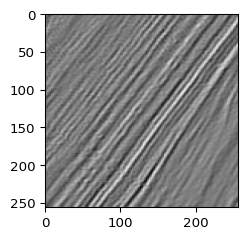

In [9]:
# random augmentation pipeline
random_aug_img = augment(img)
ia.imshow(random_aug_img)

os.path.exists(filename) False /Users/anderskampenes/Documents/Dokumenter/NTNU/MASTER/code/data/processed/f3_entire_int8_inline.npy
No data found at /Users/anderskampenes/Documents/Dokumenter/NTNU/MASTER/code/data/processed/f3_entire_int8_inline.npy. Generating new from seimsic cube
651 951 462
data.shape, label.shape :  (651, 951, 462) (651,)
Splits 0.9 0.9
train/testsplit:  (585, 951, 462) (66, 951, 462) (585,) (66,)
train/val split:  (526, 951, 462) (59, 951, 462)
Sequence of indexes used as labels for train, val and test:  525 584 650
splits plot 0.81 0.9


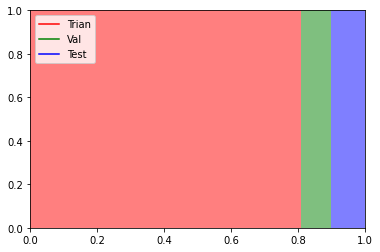

idx [208   1]
before cropped_labels  (2,) [208   1]
cropped_batch  (6, 256, 256) 2
0 3
3 6
after cropped_labels  (6, 1) [[208]
 [208]
 [208]
 [  1]
 [  1]
 [  1]]
next shape (6, 256, 256) (6, 1)
SeismicGenerator outputs:  (6, 256, 256) (6, 1)


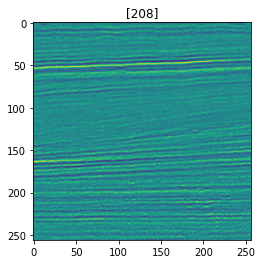

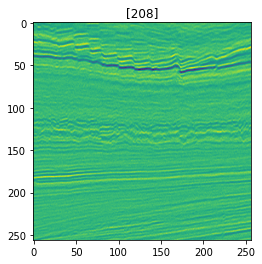

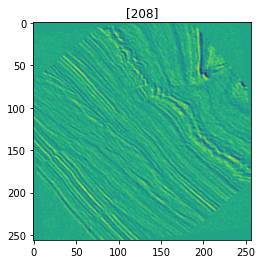

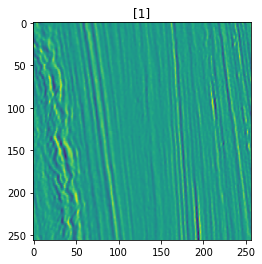

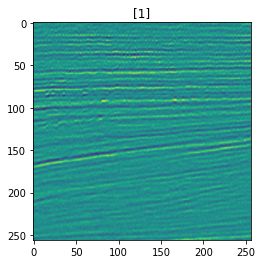

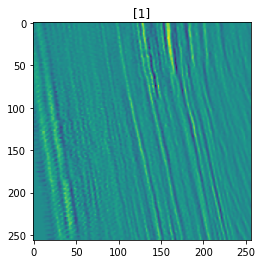

In [10]:
# using it in our generator looks like this 
image_size = 256
num_crops = 3
crop_size = 200
batch_size = 2
ag = SeismicImageGenerator(batch_size=batch_size, image_size=image_size, num_crops=num_crops, subset="train", augmentation=True)
# Using for loop to print out siemsc form generator
max = 10
for (x, y) in ag:
    print("SeismicGenerator outputs: ", x.shape, y.shape)
    #plotting a random patch 
    for i in range(batch_size*num_crops):
        img = x[i].T
        plt.imshow(img)
        plt.title(str(y[i]))
        plt.show()
    break;